In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import vector
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.optimize import differential_evolution

In [2]:
samples_4mu = [ 
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_new_merged")

events_4mu = {}
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/5 [00:00<?, ?it/s]

root://cms-xrd-global.cern.ch//home-d/dolee/SIDM/new_V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root


OSError: XRootD error: [ERROR] Operation expired
in file root://cms-xrd-global.cern.ch//home-d/dolee/SIDM/new_V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root

In [3]:
samples_4mu = [

    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root",
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root",
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root",
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root",
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root",
]

In [5]:
events_4mu = {}

test1 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root",
    schemaclass=NanoAODSchema,
).events()

test2 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root",
    schemaclass=NanoAODSchema,
).events()

test3 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root",
    schemaclass=NanoAODSchema,
).events()

test4 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root",
    schemaclass=NanoAODSchema,
).events()

test5 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root",
    schemaclass=NanoAODSchema,
).events()

In [6]:
events_4mu['4mu_500GeV_5p0GeV_0p08mm'] = test1
events_4mu['4mu_500GeV_5p0GeV_0p8mm'] = test2
events_4mu['4mu_500GeV_5p0GeV_8p0mm'] = test3
events_4mu['4mu_500GeV_5p0GeV_40p0mm'] = test4
events_4mu['4mu_500GeV_5p0GeV_80p0mm'] = test5

In [7]:
events_4mu

{'4mu_500GeV_5p0GeV_0p08mm': <NanoEventsArray [<event 1:1:2>, ... <event 1:1:5>] type='393 * event'>,
 '4mu_500GeV_5p0GeV_0p8mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:1:5>] type='1853 * event'>,
 '4mu_500GeV_5p0GeV_8p0mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:1:5>] type='417 * event'>,
 '4mu_500GeV_5p0GeV_40p0mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:1:5>] type='2543 * event'>,
 '4mu_500GeV_5p0GeV_80p0mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:1:124>] type='9231 * event'>}

In [8]:
print(events_4mu["4mu_500GeV_5p0GeV_0p08mm"].fields)

['DSAMuonVertexRefittedTracks', 'CaloMET', 'SubJet', 'FatJet', 'fixedGridRhoFastjetAll', 'Jet', 'IsoTrack', 'L1Reco', 'genTtbarId', 'LHEReweightingWeight', 'LHEPdfWeight', 'PuppiMET', 'Pileup', 'fixedGridRhoFastjetCentralChargedPileUp', 'PatDSAMuonVertexRefittedTracks', 'GenMET', 'genWeight', 'PatMuonVertexRefittedTracks', 'PSWeight', 'L1PreFiringWeight', 'DeepMETResolutionTune', 'LHE', 'GenIsolatedPhoton', 'LHEPart', 'SoftActivityJetHT2', 'GenJetAK8', 'BS', 'DSAMuon', 'LowPtElectron', 'GenDressedLepton', 'DSAMuonVertex', 'LHEScaleWeight', 'DeepMETResponseTune', 'TrigObj', 'SoftActivityJetNjets5', 'PatMuonVertex', 'run', 'PatDSAMuonVertex', 'RawPuppiMET', 'Tau', 'event', 'fixedGridRhoFastjetCentralNeutral', 'OtherPV', 'GenVtx', 'GenJet', 'SV', 'HLTriggerFinalPath', 'L1', 'L1simulation', 'SoftActivityJetHT10', 'PV', 'GenVisTau', 'SoftActivityJet', 'MET', 'Generator', 'HTXS', 'ChsMET', 'luminosityBlock', 'FsrPhoton', 'GenPart', 'LHEWeight', 'fixedGridRhoFastjetCentralCalo', 'boostedTau',

In [11]:
print(events_4mu["4mu_500GeV_5p0GeV_0p08mm"].GenPart.fields)

['eta', 'mass', 'phi', 'pt', 'genPartIdxMother', 'pdgId', 'status', 'statusFlags', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'genPartIdxMotherG', 'distinctParentIdxG', 'childrenIdxG', 'distinctChildrenIdxG', 'distinctChildrenDeepIdxG']


In [51]:
print(events_4mu["4mu_500GeV_5p0GeV_0p08mm"].GenPart.children.pdgId)

[[[35], [], [35], [32, 32], [-13, 13], [-13, ... [], [], [], [], [], [], [], [], []]]


In [14]:
print(events_4mu["4mu_500GeV_5p0GeV_0p08mm"].GenVtx.fields)

['x', 'y', 'z', 't0']


In [58]:
print(events_4mu["4mu_500GeV_5p0GeV_0p08mm"].GenPart.children.vx)

[[[0.0103], [], [0.0103], [0.0103, 0.0103], [0.0463, ... [], [], [], [], [], [], []]]


In [64]:
genpart = events_4mu["4mu_500GeV_5p0GeV_0p08mm"].GenPart
dps = genpart[abs(genpart.pdgId) == 32]
mask = ak.all(abs(dps.children.pdgId) == 13, axis=-1)
dps_tomu = dps[mask]

In [65]:
dps_tomu_vec = vector.zip({
        "pt": dps_tomu.pt,
        "eta": dps_tomu.eta,
        "phi": dps_tomu.phi,
        "mass": dps_tomu.mass})

In [18]:
lxyz = ak.flatten(((dps_tomu.vx - dps_tomu.children.vx)**2 + (dps_tomu.vy - dps_tomu.children.vy)**2 + (dps_tomu.vz - dps_tomu.children.vz)**2)**0.5)
gamma = ak.flatten(dps_tomu_vec.gamma)
beta = ak.flatten(dps_tomu_vec.beta)

In [19]:
print(len(dps))
print(len(mask))
print(len(dps_tomu))

print(len(lxyz))
print(len(gamma))
print(len(beta))

2004
2004
2004
4008
4008
4008


In [9]:
def extract_values(events, sample):
    
    genpart = events["{0}".format(sample)].GenPart
    dps = genpart[abs(genpart.pdgId) == 32]
    mask = ak.all(abs(dps.children.pdgId) == 13, axis=-1)
    dps_tomu = dps[mask]
    
    dps_tomu_vec = vector.zip({
        "pt": dps_tomu.pt,
        "eta": dps_tomu.eta,
        "phi": dps_tomu.phi,
        "mass": dps_tomu.mass})
    
    lxyz = ak.flatten(((dps_tomu.children.vx - dps_tomu.vx)**2 + (dps_tomu.children.vy - dps_tomu.vy)**2 + (dps_tomu.children.vz - dps_tomu.vz)**2)**0.5) 
    gamma = ak.flatten(dps_tomu_vec.gamma)
    beta = ak.flatten(dps_tomu_vec.beta)
    
    print("DP mass : {0}".format(dps_tomu.mass))
    
    return lxyz, gamma, beta

In [10]:
def plotting(events, sample, ranges, i, j, co):
    
    plt_range = (0, ranges)
    
    lxyz, gamma, beta = extract_values(events, sample)
    
    lxyz_gb = lxyz/(gamma * beta)
    P = stats.expon.fit(lxyz_gb)
    
    ax[i][j].hist(ak.flatten(lxyz_gb), range=plt_range, linewidth=3, bins=100, histtype='step', label=sample, density=True, color=co)
    ax[i][j].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P), label=fr"exp[ -(x - {P[0]:.3e}) / {P[1]:.3e} ] / {P[1]:.3e}", color='black')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=18)
    ax[i][j].set_xlabel(r"$V_{xyz}$/$\beta\gamma$")

DP mass : [[5, 5], [5, 4.88], [4.95, 5.02], [5, 5.02], ... 5, 5.02], [4.98, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 5], [5, 5.03], [5, 5], ... [5.08, 5], [4.98, 5.02], [5, 5], [4.98, 5]]
DP mass : [[5, 4.95], [5, 5], [5, 5.05], [5, 5.02, ... 4.98], [5, 5.02], [4.98, 5], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [4.91, 5], [5, 5], [4.94, ... 5], [5, 5.02], [5, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 4.94], [5.02, 5], [4.98, 4.95], ... [5, 5], [5, 5], [5, 5], [4.95, 5]]


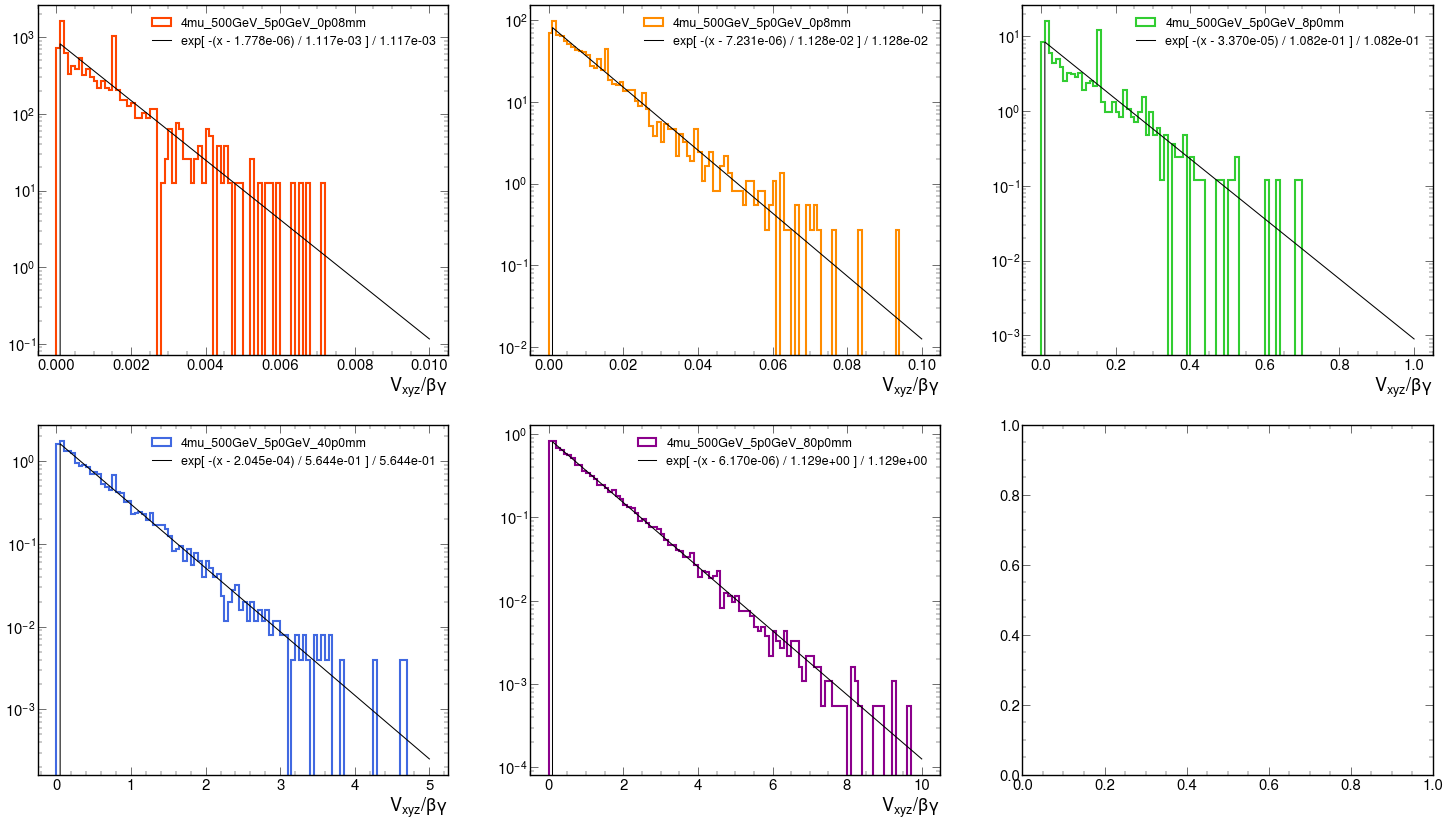

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

plotting(events_4mu, "4mu_500GeV_5p0GeV_0p08mm", 0.01,0,0, "orangered")
plotting(events_4mu, "4mu_500GeV_5p0GeV_0p8mm", 0.1,0,1, "darkorange")
plotting(events_4mu, "4mu_500GeV_5p0GeV_8p0mm", 1,0,2, "limegreen")
plotting(events_4mu, "4mu_500GeV_5p0GeV_40p0mm", 5,1,0, "royalblue")
plotting(events_4mu, "4mu_500GeV_5p0GeV_80p0mm", 10,1,1, "darkmagenta")

In [17]:
pip install zfit

  Obtaining dependency information for zfit from https://files.pythonhosted.org/packages/fd/fc/f68bf9fed8c230079810784d6906d7a719a87befcae8f2deb08274ab60c2/zfit-0.21.1-py2.py3-none-any.whl.metadata
  Using cached zfit-0.21.1-py2.py3-none-any.whl.metadata (45 kB)
  Obtaining dependency information for colored from https://files.pythonhosted.org/packages/75/d1/548f697f88872321525e294f8863efbdd1c313964b7f94e49ab0dc4f2895/colored-2.2.4-py3-none-any.whl.metadata
  Using cached colored-2.2.4-py3-none-any.whl.metadata (3.6 kB)
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Using cached colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for deprecated from https://files.pythonhosted.org/packages/20/8d/778b7d51b981a96554f29136cd59ca7880bf58094338085bcf2a979a0e6a/Deprecated-1.2.14-py2.py3-none-any.whl.metadata

In [18]:
import zfit

/opt/conda/lib/python3.9/site-packages/zfit/__init__.py:60: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
2024-08-20 23:00:30.590523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 23:00:30.606055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 23:00:30.606071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
def zfit_plotting(events, sample, ranges, i, j, co):
    
    plt_range = (0, ranges)
    rho, gamma, beta = extract_values(events, sample)
    
    lxyz_gb = ak.to_numpy(ak.flatten(rho/(gamma * beta)))
    obs_space = zfit.Space("lxyz_gb", limits=plt_range)
    data = zfit.Data.from_numpy(obs=obs_space, array=lxyz_gb)
    
    lambda_param = zfit.Parameter("lambda", 1)
    exp_model = zfit.pdf.Exponential(lambda_param, obs=obs_space)

    nll = zfit.loss.UnbinnedNLL(model=exp_model, data=data)

    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll)
    param_val = result.params[lambda_param]['value']
    
    offset = 0
    scale_param = 1 / param_val

    ax[i][j].hist(lxyz_gb, range=plt_range, linewidth=3, bins=100, histtype='step', label=sample, density=True, color=co)

    x_vals = np.linspace(*plt_range, 100)
    pdf_vals = exp_model.pdf(x_vals, norm_range=obs_space)
    ax[i][j].plot(x_vals, pdf_vals, label=fr"exp[ -(x - {offset:.3e}) / {scale_param:.3e} ] / {scale_param:.3e}", color='black')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=18)
    ax[i][j].set_xlabel(r"$L_{xyz}$/$\beta\gamma$")

DP mass : [[5, 5], [5, 4.88], [4.95, 5.02], [5, 5.02], ... 5, 5.02], [4.98, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 5], [5, 5.03], [5, 5], ... [5.08, 5], [4.98, 5.02], [5, 5], [4.98, 5]]
DP mass : [[5, 4.95], [5, 5], [5, 5.05], [5, 5.02, ... 4.98], [5, 5.02], [4.98, 5], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [4.91, 5], [5, 5], [4.94, ... 5], [5, 5.02], [5, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 4.94], [5.02, 5], [4.98, 4.95], ... [5, 5], [5, 5], [5, 5], [4.95, 5]]


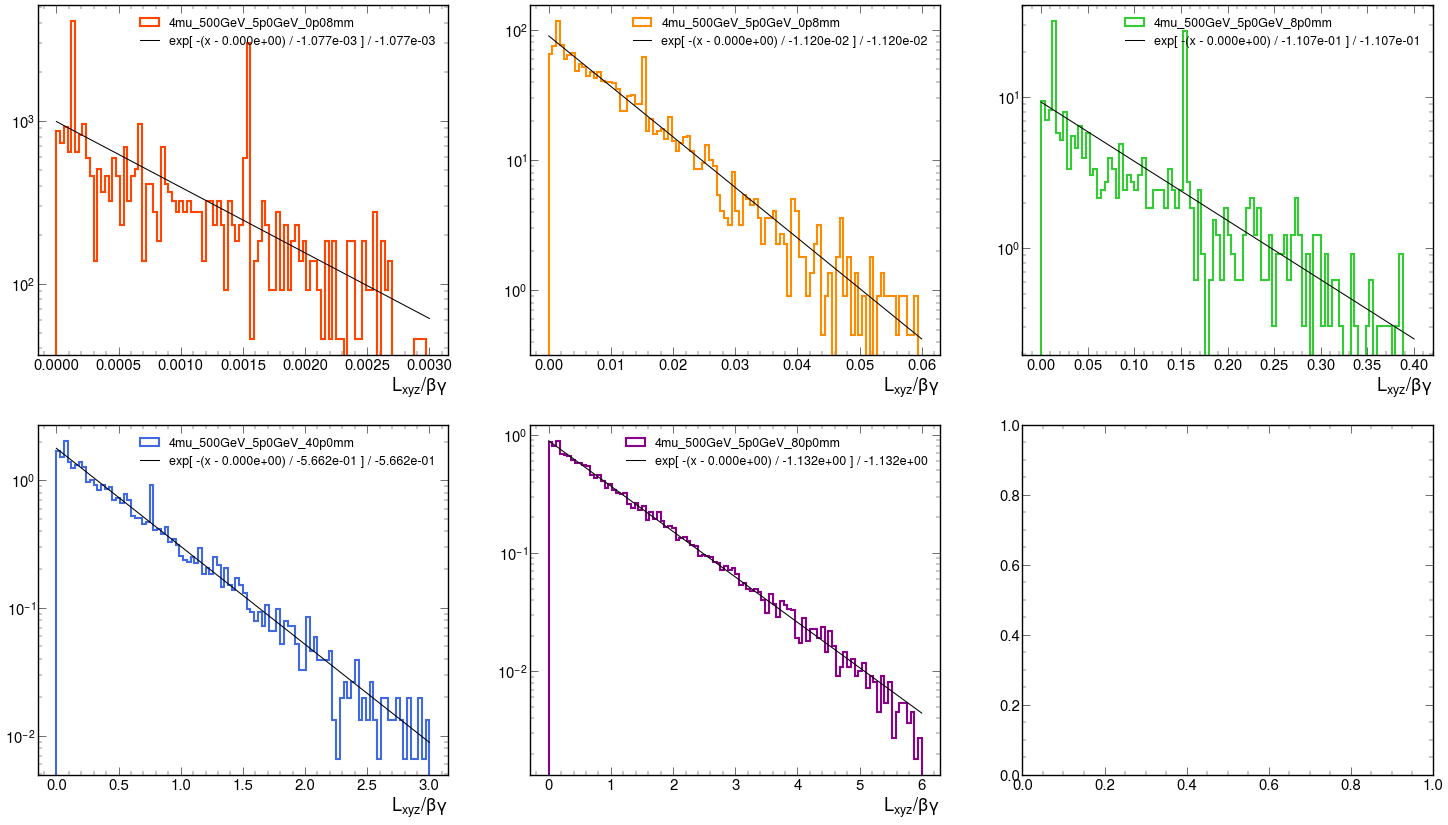

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

zfit_plotting(events_4mu, "4mu_500GeV_5p0GeV_0p08mm", 0.003,0,0, "orangered")
zfit_plotting(events_4mu, "4mu_500GeV_5p0GeV_0p8mm", 0.06,0,1, "darkorange")
zfit_plotting(events_4mu, "4mu_500GeV_5p0GeV_8p0mm", 0.4,0,2, "limegreen")
zfit_plotting(events_4mu, "4mu_500GeV_5p0GeV_40p0mm", 3,1,0, "royalblue")
zfit_plotting(events_4mu, "4mu_500GeV_5p0GeV_80p0mm", 6,1,1, "darkmagenta")